<a href="https://colab.research.google.com/github/sijuswamy/Algorithmic-Thinking-FDP/blob/main/MLP_session1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import datasets
iris = datasets.load_iris()
# Create feature matrix
X = iris.data
# Create target vector
y = iris.target
feature_names=iris.feature_names

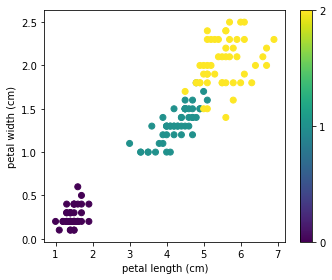

In [ ]:
x_index=2
y_index=3
plt.figure(figsize=(5,4))
plt.scatter(iris.data[:,x_index],iris.data[:,y_index],c=iris.target)
plt.colorbar(ticks=[0,1,2])
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.tight_layout()
plt.show()


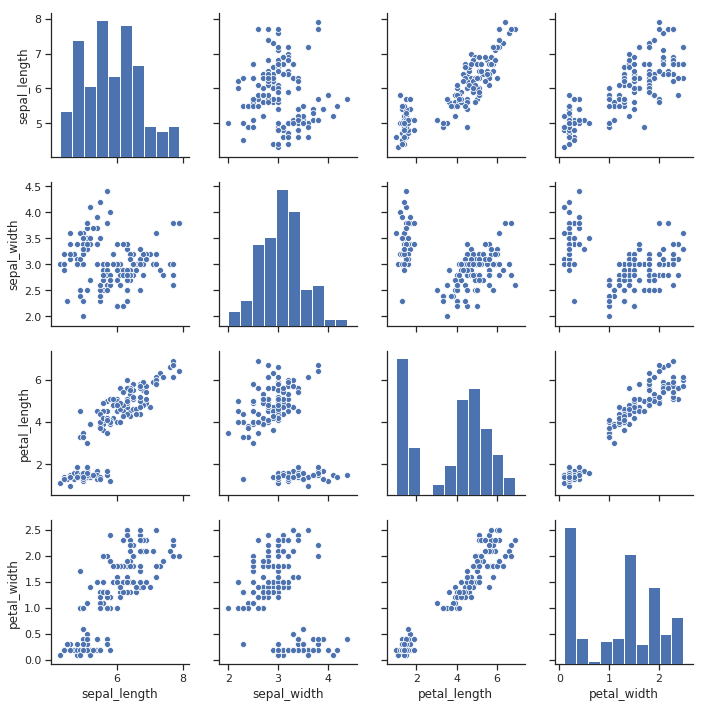

In [ ]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
iris1 = sns.load_dataset("iris")
g = sns.pairplot(iris1)

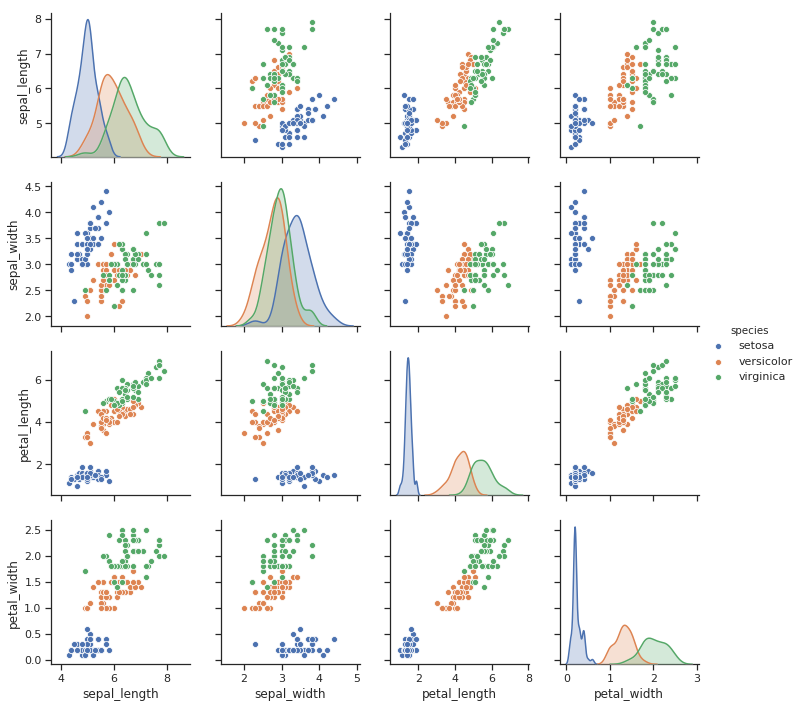

In [ ]:
g1 = sns.pairplot(iris1, hue="species")

# New Section

In [ ]:
(X_train,X_test,y_train,y_test)=train_test_split(X,y,test_size=0.2,random_state=45)


In [ ]:
import os,sys
from google.colab import drive
drive.mount('/content/drive')
os.chdir("/content/drive/My Drive/Colab Notebooks")
sys.path.append("/content/drive/My Drive/Colab Notebooks")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(sklearn.__version__)


0.21.3


In [ ]:
mlp=MLPClassifier(activation='relu',alpha=0.001,batch_size=3,beta_1=0.9,beta_2=0.99,early_stopping=False,epsilon=1e-08,hidden_layer_sizes=(20),learning_rate='constant',learning_rate_init=0.0001,max_iter=3000,momentum=0.3,nesterovs_momentum=True,power_t=0.5,random_state=4,shuffle=True,solver='sgd',tol=0.001,validation_fraction=0.1,verbose=False,warm_start=False)

In [ ]:
mlp.fit(X_train,y_train)
print("Training set score:%f"% mlp.score(X_train,y_train))
print("Test set score:%f"% mlp.score(X_test,y_test))
predictions= mlp.predict(X_test)
print("Predictions:",predictions)
print("Actuals:",y_test)

Training set score:0.916667
Test set score:0.966667
Predictions: [0 0 2 0 0 0 0 2 2 2 0 2 2 2 2 0 2 2 0 2 1 1 2 1 0 2 1 1 0 1]
Actuals: [0 0 2 0 0 0 0 2 2 2 0 2 2 2 2 0 2 2 0 1 1 1 2 1 0 2 1 1 0 1]


In [ ]:
cm=confusion_matrix(y_test,predictions)
print(cm)

[[11  0  0]
 [ 0  6  1]
 [ 0  0 12]]


## writing results to a .csv file

In [ ]:
import pandas as pd
pd.DataFrame(cm).to_csv("confussion_iris.csv")

In [ ]:
data1=pd.read_csv("confussion_iris.csv")
print(data1)

   Unnamed: 0   0  1   2
0           0  11  0   0
1           1   0  6   1
2           2   0  0  12


In [ ]:
pdata=np.array(data1.iloc[0:3,0:3])
pdata

array([[ 0, 11,  0],
       [ 1,  0,  6],
       [ 2,  0,  0]])

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[11  0  0]
 [ 0  6  1]
 [ 0  0 12]]


In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.86      0.92         7
           2       0.92      1.00      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30

